# Early Data Analysis
### Goal: Explore additional features provided by the Spotify API for this playlist.

In [1]:
import sys
sys.path.append('../')

from src.SpotipyAPI import *

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/audio_features.csv", sep=",")

In [3]:
data.head()

,Artist,Song,Popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Miley Cyrus,Flowers,87,0.0632,0.707,0.681,0.000005,0,0.0322,-4.325,1,0.0668,117.999,0.646
1,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),97,0.4170,0.715,0.620,0.000000,1,0.0822,-6.005,0,0.0484,97.950,0.172
2,SZA,Kill Bill,93,0.0521,0.644,0.735,0.144000,8,0.1610,-5.747,1,0.0391,88.980,0.418
3,Central Cee,LET GO,94,0.8590,0.735,0.449,0.000000,2,0.2130,-9.933,0,0.3830,146.016,0.514
4,Tiësto,10:35,90,0.0683,0.696,0.793,0.000004,8,0.1800,-5.733,1,0.0970,120.003,0.698


In [4]:
data.isna().value_counts()

Artist  Song   Popularity  acousticness  danceability  energy  instrumentalness  key    liveness  loudness  mode   speechiness  tempo  valence
False   False  False       False         False         False   False             False  False     False     False  False        False  False      75
dtype: int64

In [5]:
data.sort_values(by=['Popularity'], ascending=False).head(10)

,Artist,Song,Popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
16,Sam Smith,Unholy (feat. Kim Petras),100,0.01300,0.714,0.472,0.000005,2,0.2660,-7.375,1,0.0864,131.121,0.238
13,David Guetta,I'm Good (Blue),98,0.00383,0.561,0.965,0.000007,7,0.3710,-3.673,0,0.0343,128.040,0.304
1,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),97,0.41700,0.715,0.620,0.000000,1,0.0822,-6.005,0,0.0484,97.950,0.172
37,Taylor Swift,Anti-Hero,97,0.13000,0.637,0.643,0.000002,4,0.1420,-6.571,1,0.0519,97.008,0.533
50,Drake,Rich Flex,96,0.05030,0.561,0.520,0.000002,11,0.3550,-9.342,0,0.2440,153.150,0.424
26,OneRepublic,I Ain't Worried,96,0.08260,0.704,0.797,0.000745,0,0.0546,-5.927,1,0.0475,139.994,0.825
19,Meghan Trainor,Made You Look,95,0.34500,0.838,0.525,0.000002,10,0.0771,-3.562,1,0.0665,144.981,0.884
6,Rema,Calm Down (with Selena Gomez),95,0.38200,0.801,0.806,0.000669,11,0.1140,-5.206,1,0.0381,106.999,0.802
20,Oliver Tree,Miss You,95,0.01280,0.587,0.742,0.001070,6,0.1460,-6.640,0,0.0529,145.007,0.199
48,Harry Styles,As It Was,94,0.34200,0.520,0.731,0.001010,6,0.3110,-5.338,0,0.0557,173.930,0.662


In [6]:
# Remove Artist and Song object columns, as we are just looking for trends in the numerical data
df = data.drop(['Artist', 'Song'], axis=1)
df.head()

,Popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,87,0.0632,0.707,0.681,0.000005,0,0.0322,-4.325,1,0.0668,117.999,0.646
1,97,0.4170,0.715,0.620,0.000000,1,0.0822,-6.005,0,0.0484,97.950,0.172
2,93,0.0521,0.644,0.735,0.144000,8,0.1610,-5.747,1,0.0391,88.980,0.418
3,94,0.8590,0.735,0.449,0.000000,2,0.2130,-9.933,0,0.3830,146.016,0.514
4,90,0.0683,0.696,0.793,0.000004,8,0.1800,-5.733,1,0.0970,120.003,0.698


#### Create a heatmap using the above numerical data

In [7]:
# compute our correlation matrix
corr = df.corr()

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

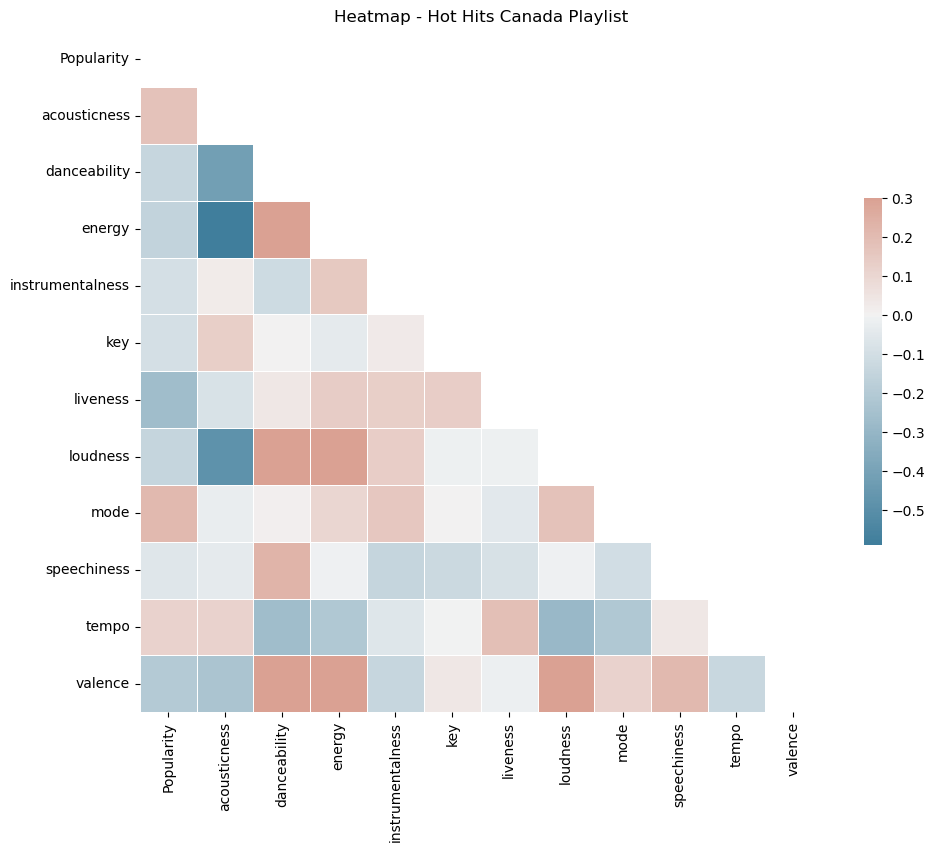

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set labels
plt.title('Heatmap - Hot Hits Canada Playlist')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save figure to file
plt.savefig("../images/playlist-audio-features-heatmap.png")

### Heatmap Correlations

Based on the above heatmap, there are correlations between *danceability, loudness* and *energy*, especially when looking at *valence*. The interesting observation here comes from Spotify's description of valence:

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). [Source: Spotify Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

It's also interesting that the *popularity* of the individual tracks only shows some significant correlation with *mode* and *acousticness*, with *tempo* having mild impact, and the rest scoring quite low against *popularity*

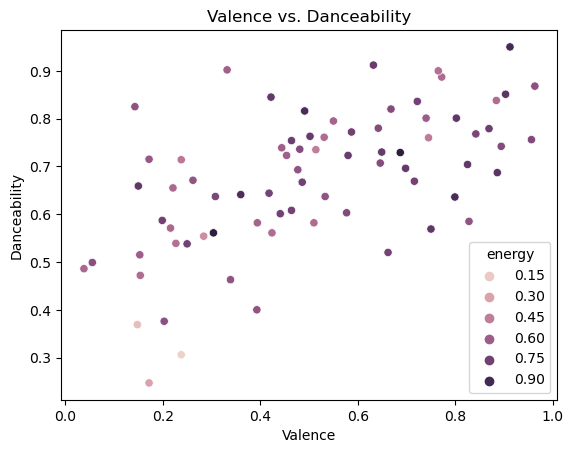

In [43]:
sns.scatterplot(df, x='valence', y='danceability', hue='energy')
plt.title('Valence vs. Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.savefig('../images/Valence-vs-Danceability-Scatter.png')

Text(0, 0.5, 'Danceability')

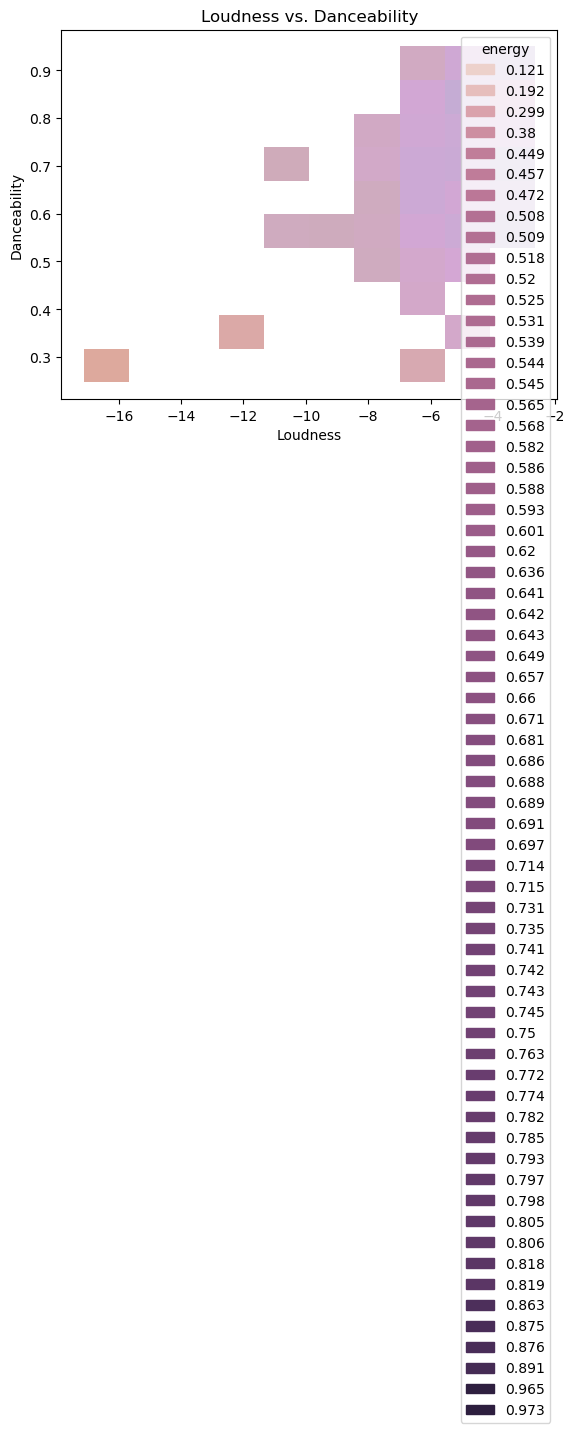

In [42]:
sns.histplot(df, x='loudness', y='danceability', hue='energy', bins=10)
plt.title('Loudness vs. Danceability')
plt.xlabel('Loudness')
plt.ylabel('Danceability')